<a href="https://colab.research.google.com/github/noora20FH/PCVK/blob/week9/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Noora Aulia Hidayat

TI-3I

2041720046



#PRACTICUM

In [1]:
from google.colab import drive


#Access my google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


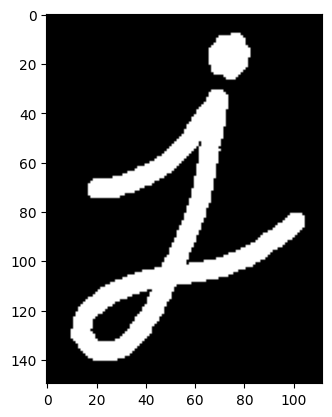

In [15]:
  #load the image
img = cv.imread('/content/drive/MyDrive/j.png')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')


###create the structuring element (SE) which is a 5x5 square:

In [16]:
se = np.ones((5, 5), dtype=np.uint8)

#no.1 Make the dilation operation and show the results on the image of the Structuring Element shaped 5 x 5 square without using the OpenCV morphology library, thus generating the results shows in the figure (Use image “j.png”)

###Define dilation function

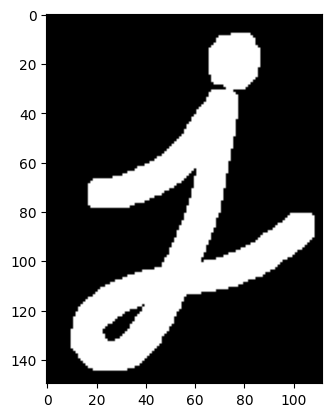

In [22]:
def dilation(img, se):
    # Get the dimensions of the image and the SE
    img_height, img_width = img.shape
    se_height, se_width = se.shape
    
    # Create a padding around the image with zeros
    img_padded = np.zeros((img_height + se_height - 1, img_width + se_width - 1), dtype=np.uint8)
    img_padded[se_height - 1:img_height + se_height - 1, se_width - 1:img_width + se_width - 1] = img
    
    # Create a new image for the result
    result = np.zeros((img_height, img_width), dtype=np.uint8)
    
    # Iterate over every pixel in the image
    for i in range(img_height):
        for j in range(img_width):
            # Check if the SE overlaps with the image at this pixel
            if (img_padded[i:i+se_height, j:j+se_width] * se).max() > 0:
                result[i, j] = 255
    
    return result

    # Apply the dilation operation to the image
dilated_img = dilation(img_gray, se)

# Show the results
plt.imshow(dilated_img, cmap='gray')
plt.show()

#no. 2 Make the erosion operation and show the results on the image of the Structuring Element shaped 5 x 5 square without using the OpenCV morphology library, thus generating the results shows in the figure (Use image “j.png”)

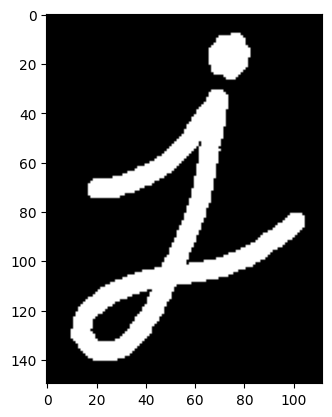

In [27]:
  #load the image
img = cv.imread('/content/drive/MyDrive/j.png')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')


In [28]:
se = np.ones((5, 5), dtype=np.uint8)

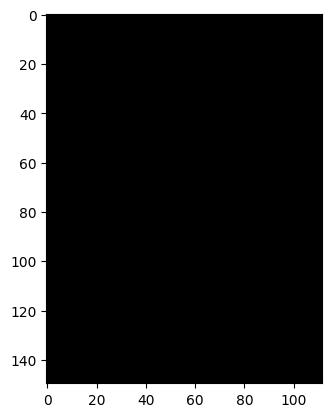

In [29]:
def erosion(img, se):
    # Get the dimensions of the image and the SE
    img_height, img_width = img.shape
    se_height, se_width = se.shape
    
    # Create a padding around the image with zeros
    img_padded = np.zeros((img_height + se_height - 1, img_width + se_width - 1), dtype=np.uint8)
    img_padded[se_height - 1:img_height + se_height - 1, se_width - 1:img_width + se_width - 1] = img
    
    # Create a new image for the result
    result = np.zeros((img_height, img_width), dtype=np.uint8)
    
    # Iterate over every pixel in the image
    for i in range(img_height):
        for j in range(img_width):
            # Check if the SE is fully contained in the image at this pixel
            if (img_padded[i:i+se_height, j:j+se_width] == se).all():
                result[i, j] = 255
    
    return result

# Apply the erosion operation to the image
eroded_img = erosion(img_gray, se)

# Show the results
plt.imshow(eroded_img, cmap='gray')
plt.show()







#NO. 3 Make the dilation operation and show the results on the image of the Structuring Element shaped 5 x 5 square using the OpenCV morphology library, thus generating the results shows in the figure (Use image “j.png”)

In [30]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

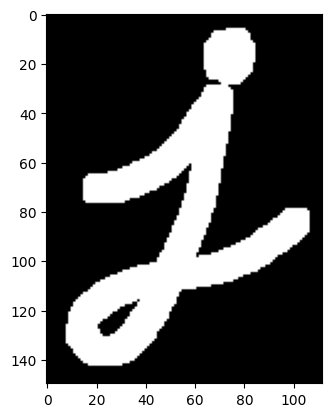

In [31]:
img = cv.imread('/content/drive/MyDrive/j.png')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

# Create the structuring element
se = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

def dilation(img, se):
    # Apply the dilation operation using the morphology library
    dilated_img = cv.dilate(img, se)
    
    return dilated_img


# Apply the dilation operation to the image
dilated_img = dilation(img, se)

# Show the results
plt.imshow(dilated_img, cmap='gray')
plt.show()

#Make the erotion operation and show the results on the image of the Structuring Element shaped 5 x 5 square using the OpenCV morphology library, thus generating the results shows in the figure (Use image “j.png”)

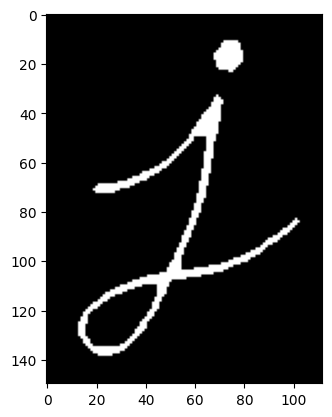

In [32]:
# Create the structuring element
se = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

def erosion(img, se):
    # Apply the erosion operation using the morphology library
    eroded_img = cv.erode(img, se)
    
    return eroded_img


# Apply the erosion operation to the image
eroded_img = erosion(img, se)

# Show the results
plt.imshow(eroded_img, cmap='gray')
plt.show()